Asignment 1

1. DDR

create bucke st446-as1-alulu and copy author-large.txt into the bucket

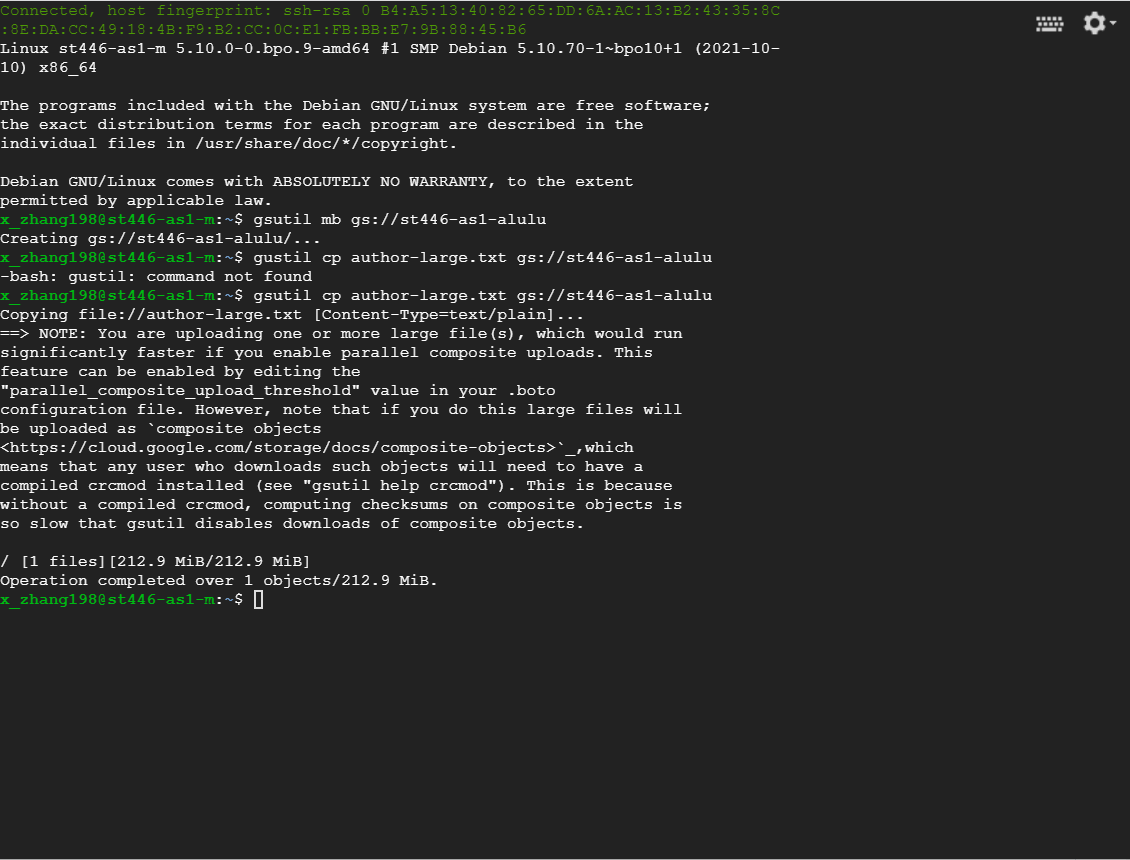

create RDD

In [1]:
data_file = sc.textFile("gs://st446-as1-alulu/author-large.txt", 4)

In [2]:
data_file.take(5)

['Jurgen Annevelink\tModern Database Systems\tObject SQL - A Language for the Design and Implementation of Object Databases.\t1995',
 'Rafiul Ahad\tModern Database Systems\tObject SQL - A Language for the Design and Implementation of Object Databases.\t1995',
 'Amelia Carlson\tModern Database Systems\tObject SQL - A Language for the Design and Implementation of Object Databases.\t1995',
 'Daniel H. Fishman\tModern Database Systems\tObject SQL - A Language for the Design and Implementation of Object Databases.\t1995',
 'Michael L. Heytens\tModern Database Systems\tObject SQL - A Language for the Design and Implementation of Object Databases.\t1995']

In [3]:
import numpy as np
data_file_conv = data_file.map(lambda row: np.array(row.strip().split("\t")))
data_file_conv.take(5)

[array(['Jurgen Annevelink', 'Modern Database Systems',
        'Object SQL - A Language for the Design and Implementation of Object Databases.',
        '1995'], dtype='<U78'),
 array(['Rafiul Ahad', 'Modern Database Systems',
        'Object SQL - A Language for the Design and Implementation of Object Databases.',
        '1995'], dtype='<U78'),
 array(['Amelia Carlson', 'Modern Database Systems',
        'Object SQL - A Language for the Design and Implementation of Object Databases.',
        '1995'], dtype='<U78'),
 array(['Daniel H. Fishman', 'Modern Database Systems',
        'Object SQL - A Language for the Design and Implementation of Object Databases.',
        '1995'], dtype='<U78'),
 array(['Michael L. Heytens', 'Modern Database Systems',
        'Object SQL - A Language for the Design and Implementation of Object Databases.',
        '1995'], dtype='<U78')]

Extract authot name and title

In [4]:
author_book = data_file_conv.map(lambda row: (row[2], row[0]))
author_book.take(5)

[('Object SQL - A Language for the Design and Implementation of Object Databases.',
  'Jurgen Annevelink'),
 ('Object SQL - A Language for the Design and Implementation of Object Databases.',
  'Rafiul Ahad'),
 ('Object SQL - A Language for the Design and Implementation of Object Databases.',
  'Amelia Carlson'),
 ('Object SQL - A Language for the Design and Implementation of Object Databases.',
  'Daniel H. Fishman'),
 ('Object SQL - A Language for the Design and Implementation of Object Databases.',
  'Michael L. Heytens')]

Order title and author names

In [5]:
author_book_order = author_book.sortBy(lambda x: x[0])
author_book_order.take(5)

[(' (Extended Abstract).', 'Eric Allender'),
 (' (Extended Abstract).', 'Vivek Gore'),
 (' +  Riemannian Metric.', 'Angelos Barmpoutis'),
 (' +  Riemannian Metric.', 'Baba C. Vemuri'),
 (' +  in Theory and Practice.', 'Christoph Betz')]

Group author names of the same book together

In [6]:
author_pair = author_book_order.groupByKey().mapValues(list)
author_pair.take(5)

[(' 2 Processor.',
  ['Terry Lyon', 'Eric Delano', 'Cameron McNairy', 'Dean Mulla']),
 (' Collocation - Galerkin Methods.', ['Graham F. Carey', 'M. F. Wheeler']),
 (' Functions.', ['Merrick L. Furst', 'Jeffrey C. Jackson', 'Sean W. Smith']),
 (' Fuzzy - Phone: A Fuzzy Logic based Tool.',
  ['Dimitris Karagiannis', 'Rainer Staudte', 'Hans Grnberger']),
 (' INFINITY  Control for Networked Control Systems (NCSs) with Markovian Packet-Loss.',
  ['Jie Fu', 'Yaping Dai'])]

The following function split grouped author names into pairs

In [7]:
def pairfunc(X):
    top=len(X)
    c = []
    Y= sorted(X)
    for i in range(0,top):
        for j in range((i+1),top):
            c.append((Y[i],Y[j]))
    return c



Take only author names

In [8]:
author_name = author_pair.map(lambda row: (row[1]))
author_name.take(5)

[['Terry Lyon', 'Eric Delano', 'Cameron McNairy', 'Dean Mulla'],
 ['Graham F. Carey', 'M. F. Wheeler'],
 ['Merrick L. Furst', 'Jeffrey C. Jackson', 'Sean W. Smith'],
 ['Dimitris Karagiannis', 'Rainer Staudte', 'Hans Grnberger'],
 ['Jie Fu', 'Yaping Dai']]

Pair author names

In [9]:
author_name1 = author_name.flatMap(lambda x : pairfunc(x))
author_name1.take(5)

[('Cameron McNairy', 'Dean Mulla'),
 ('Cameron McNairy', 'Eric Delano'),
 ('Cameron McNairy', 'Terry Lyon'),
 ('Dean Mulla', 'Eric Delano'),
 ('Dean Mulla', 'Terry Lyon')]

In [10]:
author_name2 = author_name1.map(lambda x : (x,1))
author_name2.take(5)

[(('Cameron McNairy', 'Dean Mulla'), 1),
 (('Cameron McNairy', 'Eric Delano'), 1),
 (('Cameron McNairy', 'Terry Lyon'), 1),
 (('Dean Mulla', 'Eric Delano'), 1),
 (('Dean Mulla', 'Terry Lyon'), 1)]

Count the numer of author pairs

In [11]:
author_name2.reduceByKey(lambda a, b: a + b).takeOrdered(10, key = lambda x: -x[1])

[(('Irith Pomeranz', 'Sudhakar M. Reddy'), 249),
 (('Amr El Abbadi', 'Divyakant Agrawal'), 161),
 (('Makoto Takizawa', 'Tomoya Enokido'), 141),
 (('Didier Dubois', 'Henri Prade'), 122),
 (('Elizabeth Chang', 'Tharam S. Dillon'), 118),
 (('Hyun-Sung Kim', 'Kee-Young Yoo'), 111),
 (('Mary Jane Irwin', 'Narayanan Vijaykrishnan'), 107),
 (('Mahmut T. Kandemir', 'Mary Jane Irwin'), 100),
 (('Giuseppe De Giacomo', 'Maurizio Lenzerini'), 99),
 (('Chun Chen', 'Jiajun Bu'), 99)]

2.SQL

Import data

In [12]:
filename = 'gs://st446-as1-alulu/author-large.txt'
author_large_no_schema = spark.read.csv(filename, header='false', sep='\t')

Create table

In [13]:
from pyspark.sql.types import *

schema = StructType([
    StructField("author", StringType(), True),    
    StructField("journal", StringType(), True),
    StructField("title", StringType(), True),
    StructField("year", LongType(), True)
])

author_large = spark.read.csv(filename, header='false', schema=schema, sep='\t')
author_large.createOrReplaceTempView("author_large")

In [14]:
author_large.head()

Row(author='Jurgen Annevelink', journal='Modern Database Systems', title='Object SQL - A Language for the Design and Implementation of Object Databases.', year=1995)

Count the numer of author pairs

In [15]:
spark.sql("select a.author,b.author, Count(a.author) as num\
           from author_large a join author_large b on a.title = b.title\
           where a.author > b. author group by a.author, b.author\
           order by Count(a.author) desc").show(10)

+--------------------+-------------------+---+
|              author|             author|num|
+--------------------+-------------------+---+
|   Sudhakar M. Reddy|     Irith Pomeranz|249|
|   Divyakant Agrawal|      Amr El Abbadi|161|
|      Tomoya Enokido|    Makoto Takizawa|141|
|         Henri Prade|      Didier Dubois|122|
|    Tharam S. Dillon|    Elizabeth Chang|118|
|       Kee-Young Yoo|      Hyun-Sung Kim|111|
|Narayanan Vijaykr...|    Mary Jane Irwin|107|
|     Mary Jane Irwin| Mahmut T. Kandemir|100|
|  Maurizio Lenzerini|Giuseppe De Giacomo| 99|
|           Jiajun Bu|          Chun Chen| 99|
+--------------------+-------------------+---+
only showing top 10 rows



3.Hive

Add jar file using following code 

In [ ]:
ADD JAR json-serde-1.3.8-jar-with-dependencies.jar;

Create hive table using following code

In [ ]:
CREATE EXTERNAL TABLE yelpuser (
  user_id STRING,
  name STRING,
  review_count INT,
  yelping_since STRING,
  friends ARRAY<STRING>,
  useful INT,
  funny INT,
  cool INT,
  fans INT,
  elite ARRAY<STRING>,
  average_stars FLOAT,
  compliment_hot INT,
  compliment_more INT,
  compliment_profile INT,
  compliment_cute INT,
  compliment_list INT,
  compliment_note INT,
  compliment_plain INT,
  compliment_cool INT,
  compliment_funny INT,
  compliment_writer INT,
  compliment_photos INT,
  type STRING)
ROW FORMAT SERDE 'org.openx.data.jsonserde.JsonSerDe' ;

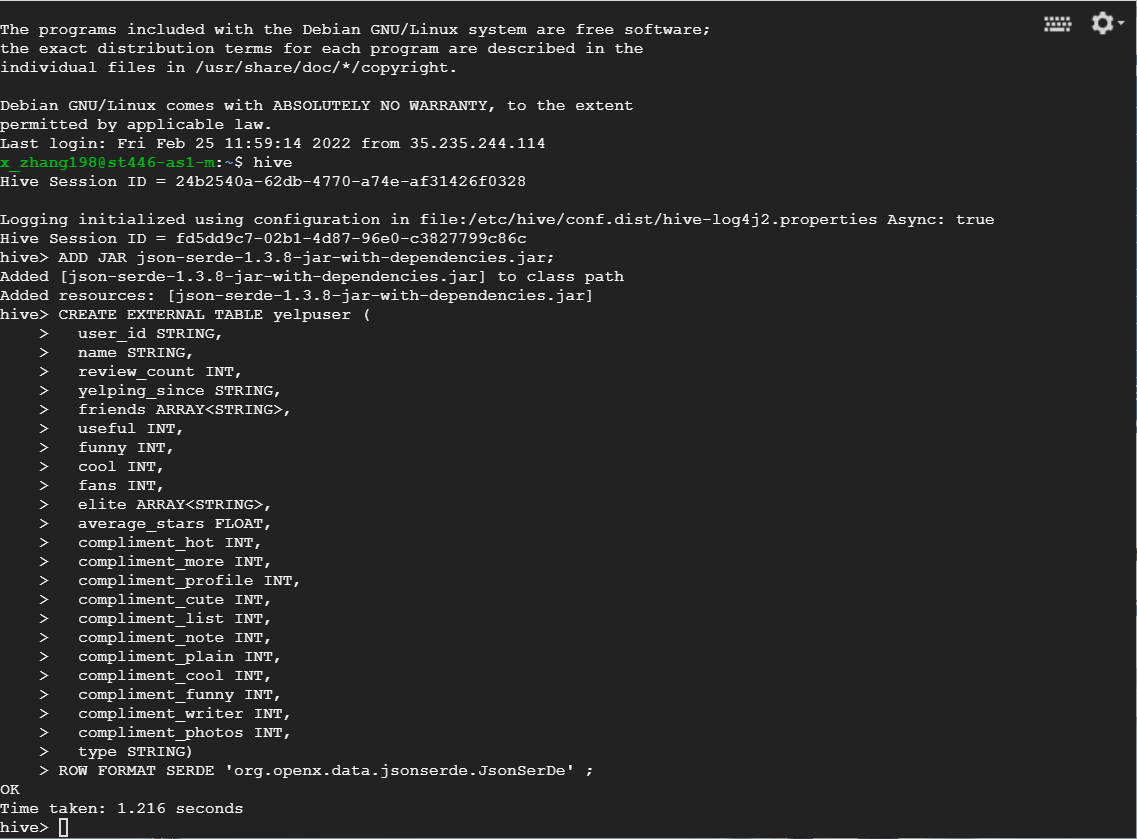

Load data into hive table

In [ ]:
LOAD DATA INPATH 'gs://st446-as1-alulu/data/yelp_academic_dataset_user.json' into table yelpuser;

retrieve the schema

In [ ]:
DESCRIBE yelpuser;

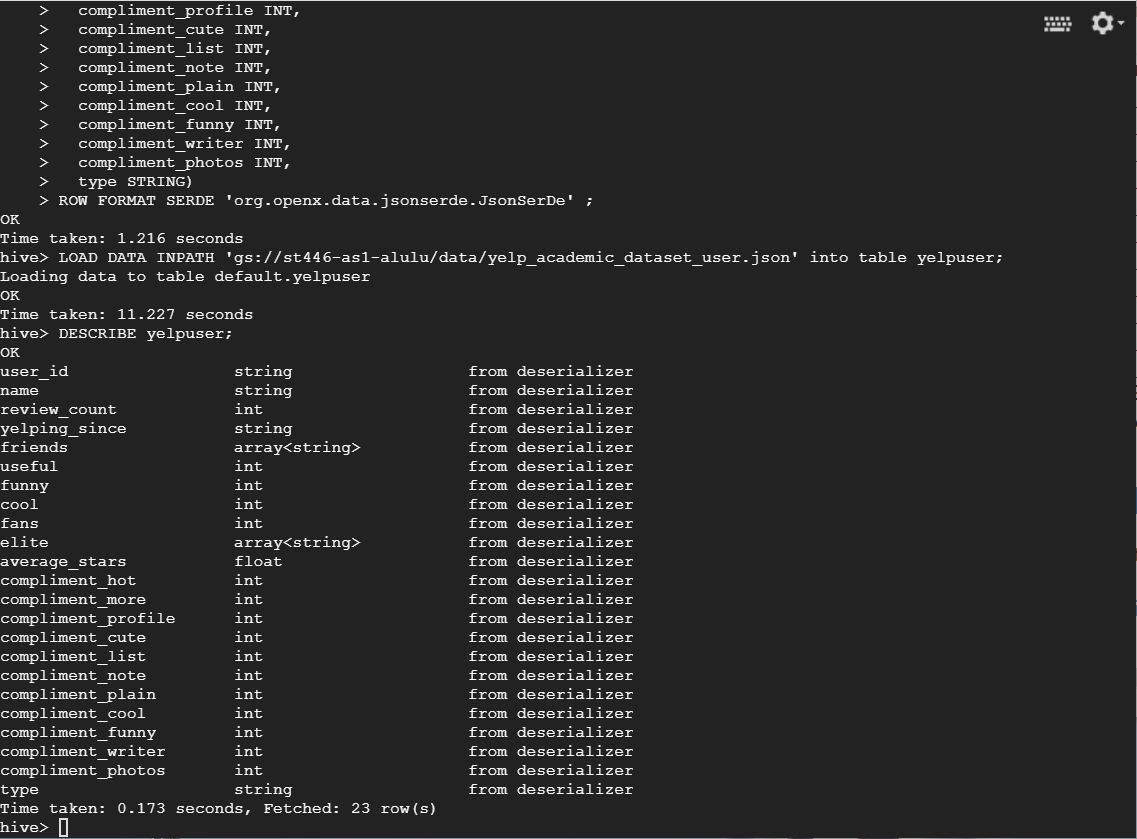

Count number of rows

In [ ]:
SELECT Count(*) FROM yelpuser;

Select to 10 users with most rewiew numbers

In [ ]:
SELECT user_id, review_count FROM yelpuser GROUP BY user_id, review_count ORDER BY review_count DESC LIMIT 10;

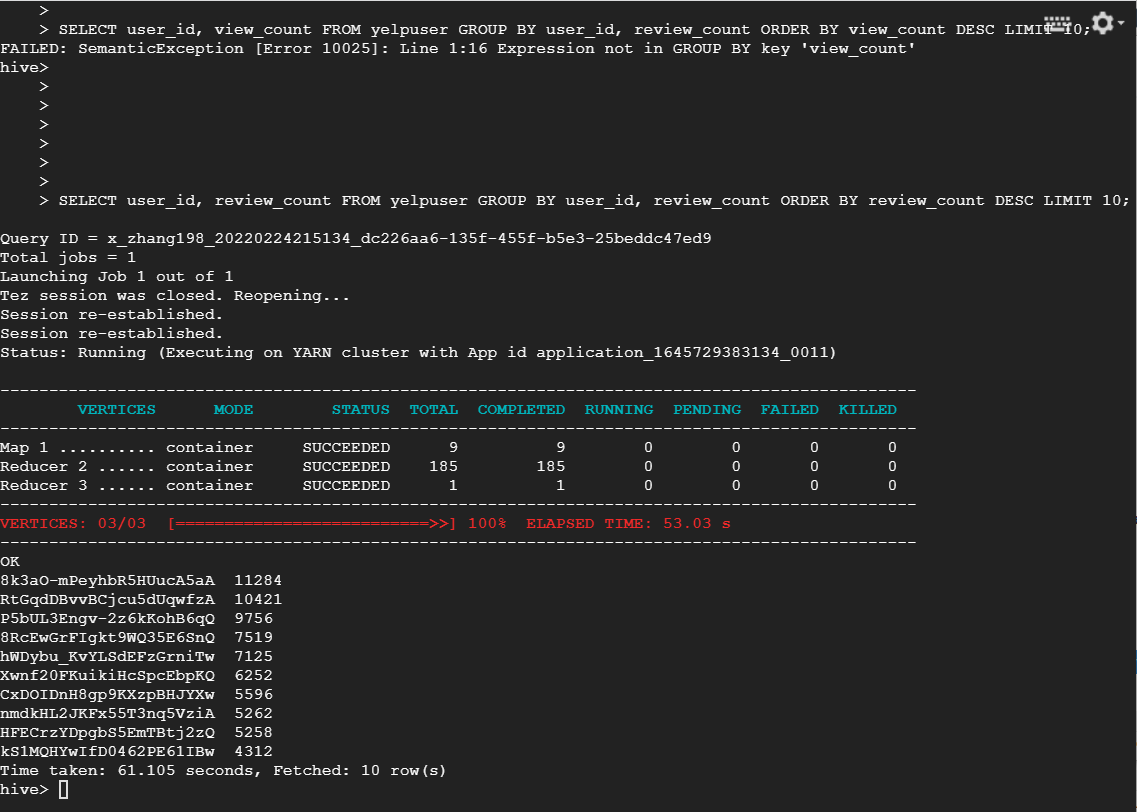